## Part 0: Prerequisites:


![Einstein](https://i.imgur.com/vfPDHGN.png)

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow.


*. Basic programming skill


# Basic Machine learning

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image=Image(url="https://www.oreilly.com/library/view/neural-network-programming/9781788390392/assets/ca899bdb-1bb7-4491-b8b4-79db174760e5.png")

# Preview of Data
1.    There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
2.    There are no null values, so we don't have to worry about that.
3.     There are 50 observations of each species (setosa, versicolor, virginica).

In [2]:
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn import metrics
clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
df_data=pd.DataFrame(data=iris.data,columns=[ 'sepal length ','sepal width ',' petal length ','petal width ']) 
df_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df_target=pd.DataFrame(data=iris.target)
df_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
X, y = iris.data, iris.target
clf.fit(X, y)  

y_pred = clf.predict(X)
metrics.accuracy_score(y, y_pred)

0.9866666666666667

# Basic deep learning

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('/home/cse31/Desktop/machine_learning/DL_1.png')
plt.figure(figsize=(100,100))
plt.imshow(img)

# Deep Learning Basics


![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations.  Deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. 
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.



In [7]:
from keras import models
from keras import layers

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib



Using TensorFlow backend.


## Classification of MNIST digit dataset

Let's build a simple fully connected neural network  classifier to classify images of handwritten digits in the MNIST dataset .

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

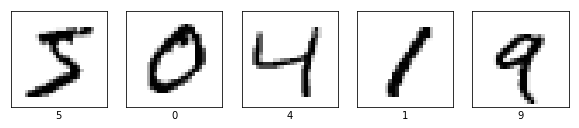

In [8]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

# Preprocess the data


In [9]:
from keras.utils import to_categorical
train_images.shape
test_images.shape
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255




train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [10]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [11]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.1888 - acc: 0.9507 - val_loss: 0.1912 - val_acc: 0.9523
Epoch 2/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.1864 - acc: 0.9511 - val_loss: 0.1987 - val_acc: 0.9500
Epoch 3/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.1864 - acc: 0.9516 - val_loss: 0.1904 - val_acc: 0.9527
Epoch 4/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.1854 - acc: 0.9520 - val_loss: 0.1950 - val_acc: 0.9523
Epoch 5/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.1856 - acc: 0.9520 - val_loss: 0.1991 - val_acc: 0.9513
Epoch 6/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1851 - acc: 0.9526 - val_loss: 0.2057 - val_acc: 0.9475
Epoch 7/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.1843 - acc: 0.9525 - val_loss: 0.2024 - val_acc

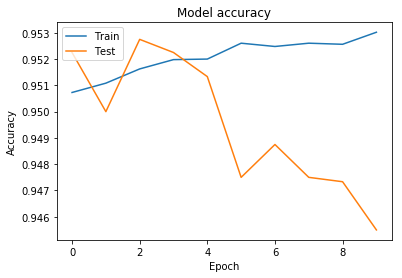

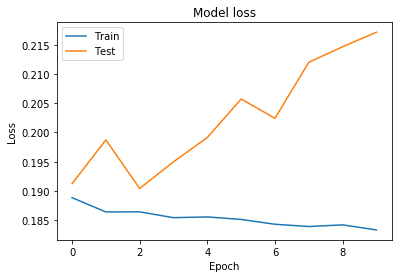

In [15]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 21us/step - loss: 0.1907 - acc: 0.9514 - val_loss: 0.1757 - val_acc: 0.9555
Epoch 2/100
54000/54000 [==============================] - 1s 22us/step - loss: 0.1904 - acc: 0.9513 - val_loss: 0.1702 - val_acc: 0.9553
Epoch 3/100
54000/54000 [==============================] - 1s 24us/step - loss: 0.1901 - acc: 0.9512 - val_loss: 0.1737 - val_acc: 0.9543
Epoch 4/100
54000/54000 [==============================] - 1s 25us/step - loss: 0.1902 - acc: 0.9519 - val_loss: 0.1766 - val_acc: 0.9545
Epoch 5/100
54000/54000 [==============================] - 1s 21us/step - loss: 0.1888 - acc: 0.9517 - val_loss: 0.1805 - val_acc: 0.9518
Epoch 6/100
54000/54000 [==============================] - 1s 25us/step - loss: 0.1888 - acc: 0.9523 - val_loss: 0.1801 - val_acc: 0.9540
Epoch 7/100
54000/54000 [==============================] - 1s 21us/step - loss: 0.1884 - acc: 0.9518 - val_loss: 0.1883 - v

54000/54000 [==============================] - 1s 20us/step - loss: 0.1882 - acc: 0.9532 - val_loss: 0.2174 - val_acc: 0.9485
Epoch 60/100
54000/54000 [==============================] - 1s 21us/step - loss: 0.1863 - acc: 0.9535 - val_loss: 0.2247 - val_acc: 0.9478
Epoch 61/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.1873 - acc: 0.9529 - val_loss: 0.2204 - val_acc: 0.9468
Epoch 62/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.1873 - acc: 0.9526 - val_loss: 0.2214 - val_acc: 0.9485
Epoch 63/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.1869 - acc: 0.9531 - val_loss: 0.2198 - val_acc: 0.9503
Epoch 64/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.1881 - acc: 0.9531 - val_loss: 0.2230 - val_acc: 0.9470
Epoch 65/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.1874 - acc: 0.9535 - val_loss: 0.2236 - val_acc: 0.9462
Epoch 66/100
54000/54000 [==============

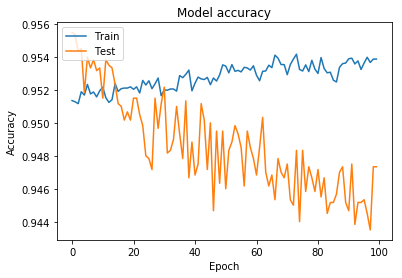

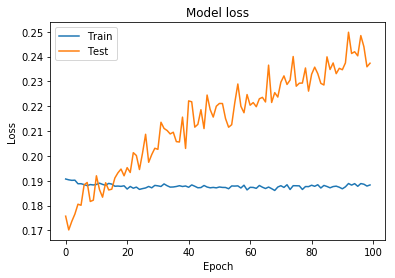

In [16]:
history = model.fit(train_images, train_labels, validation_split=0.10, epochs=100, batch_size=32, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Making predictions on test data

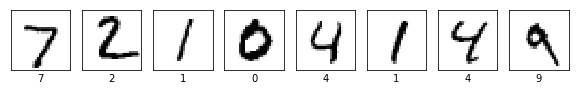

In [17]:
predicted=model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predicted[i]))
    #print(np.argmax(predicted[i]))

# Misclassifications!

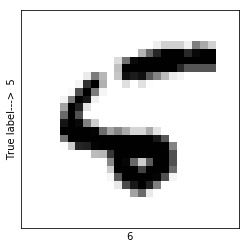

Predicted----> 6


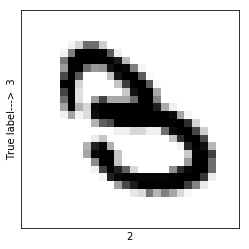

Predicted----> 2


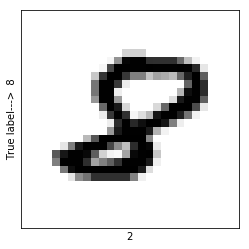

Predicted----> 2


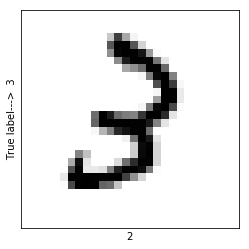

Predicted----> 2


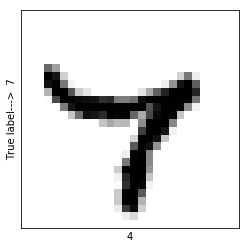

Predicted----> 4


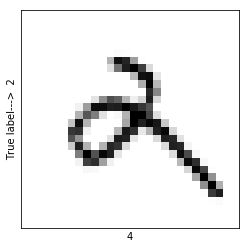

Predicted----> 4


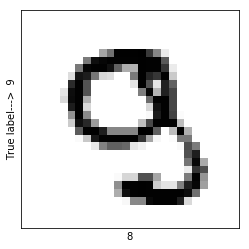

Predicted----> 8


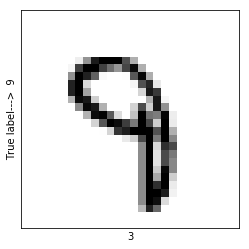

Predicted----> 3


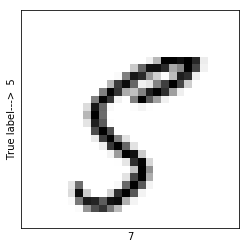

Predicted----> 7


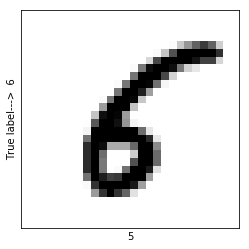

Predicted----> 5


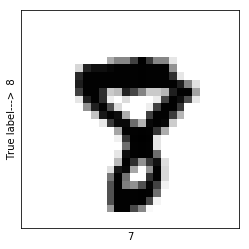

Predicted----> 7


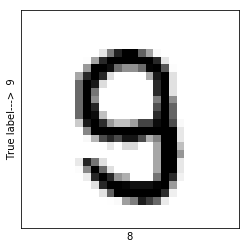

Predicted----> 8


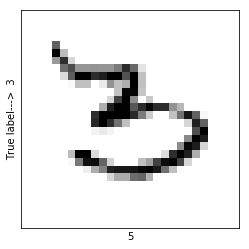

Predicted----> 5


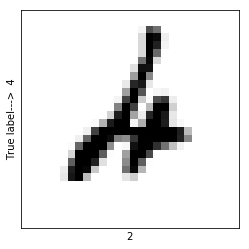

Predicted----> 2


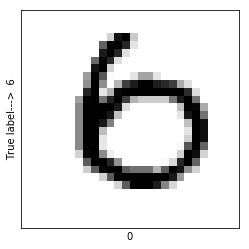

Predicted----> 0


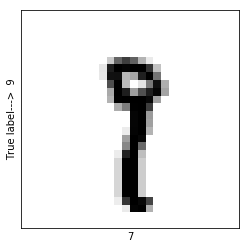

Predicted----> 7


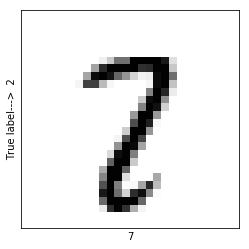

Predicted----> 7


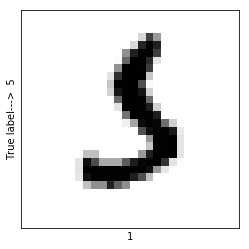

Predicted----> 1


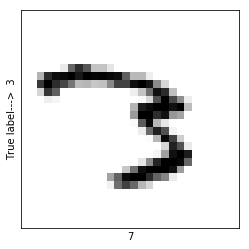

Predicted----> 7


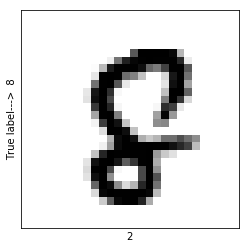

Predicted----> 2


In [18]:
for i in range(400):
    if np.argmax(predicted[i]) != np.argmax(test_labels[i]):
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(np.argmax(predicted[i]))
        plt.ylabel("True label--->  "+ str(np.argmax(test_labels[i])))
        plt.show()
        print("Predicted---->",str(np.argmax(predicted[i])))
        

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.68% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [19]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 784)
10000/10000 [==============================] - 0s 10us/step
Test accuracy: 0.9362


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better at 99.19%! This is, in part, due to successful regularization accomplished with the Dropout layers.